Exploratory Data Analysis
1. Analysis
   1. Univariate Analysis
   2. Multivariate Analysis

2. Feature Engineering
   1. Creating New Column
   2. Modifying Existing ones

3. Handling Outliers
   1. Detect Outliers
   2. Remove Outliers

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#importing dataset
df = pd.read_csv('Titanic-Dataset.csv')

In [5]:
#Shape
df.shape

(891, 12)

In [6]:
#preview tha data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#listing down the columns
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Categorical columns:

1. Survived
2. Pclass
3. Sex
4. SibSp
5. Parch
6. Embarked

Numericals columns:

1. PassengerId
2. Age
3. Fare

Mixed columns:

1. Name
2. Ticket
3. Cabin

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1. Missing values in Age, Cabin & Embarked columns
2. More than 70 percent values are missing in cabin columns will have to drop
3. Few columns have inappropriate data types

In [10]:
# dropping cabin column
df.drop(columns=['Cabin'],inplace=True)

In [11]:
# imputing missing values for age(mean value)
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [12]:
# imputing missing values for embarked
# finding the most appered value in embarked column
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
# S is the most appered value in Embarked column
df['Embarked'].fillna('S',inplace=True)

Should I change the SibSp and Parch column to categories, lets see...

In [14]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [15]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Changing datatypes for following categories...
1. Survived(category)
2. PClass(category)
3. Sex(category)
4. Age(int)
5. Embarked(category)

In [16]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [18]:
# five point summary
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\ANISH KUSHWAHA\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Out of 891, 62% percent people died in the accident :


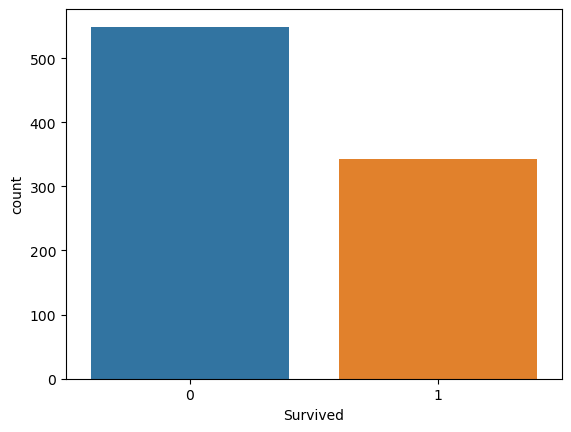

In [19]:
# Univariate Analysis
# Survived class
sns.countplot(x='Survived', data=df)
death_percent=round((df['Survived'].value_counts().values[0]/891)*100)
print('Out of 891, {}% percent people died in the accident :'.format(death_percent))

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


C:\Users\ANISH KUSHWAHA\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Pclass', ylabel='count'>

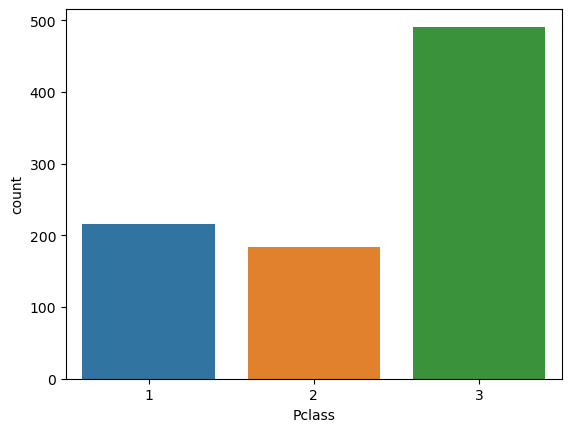

In [21]:
# Pclass column
print((df['Pclass'].value_counts()/891)*100)
sns.countplot(x='Pclass', data = df)

Conclusion:- 
1. Mostly people are travelling in class 3, its cheaper class.
2. It seems very low fare difference between class 2 & 1 because there a little difference in passengers    of both class.

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


C:\Users\ANISH KUSHWAHA\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Sex', ylabel='count'>

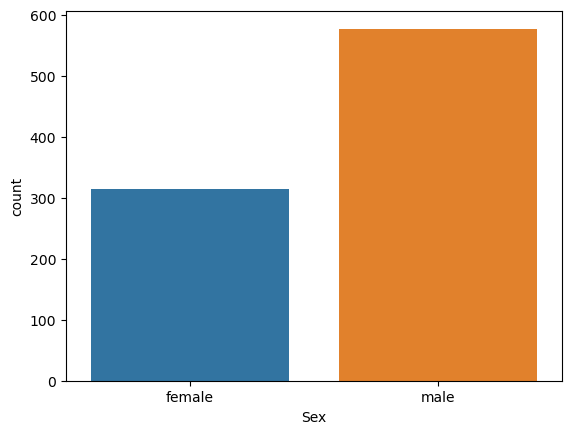

In [22]:
# Lets explore gender distribution
print((df['Sex'].value_counts()/891)*100)
sns.countplot(x='Sex',data=df)

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


<Axes: xlabel='SibSp', ylabel='count'>

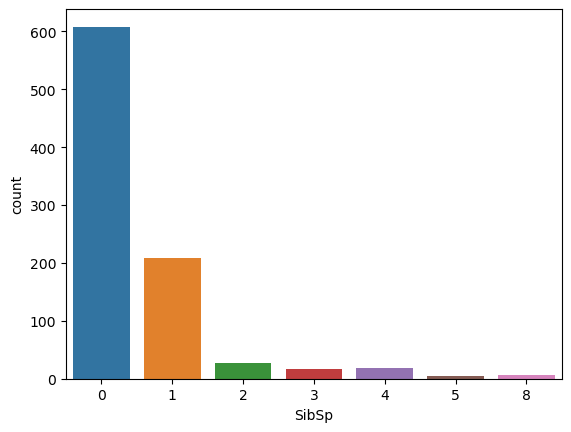

In [23]:
print(df['SibSp'].value_counts())
sns.countplot(x='SibSp',data=df)

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


<Axes: xlabel='Parch', ylabel='count'>

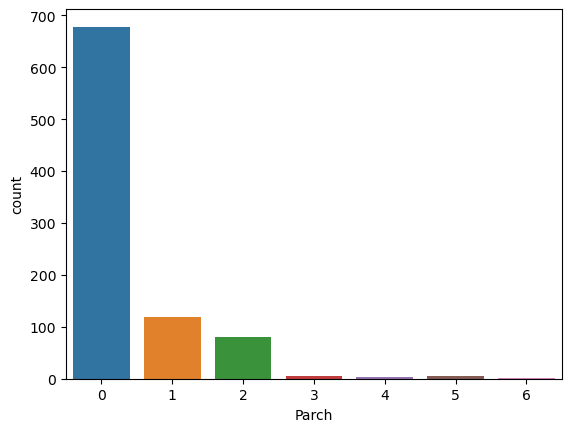

In [24]:
print((df['Parch'].value_counts()/891)*100)
sns.countplot(x='Parch',data=df)

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


C:\Users\ANISH KUSHWAHA\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Embarked', ylabel='count'>

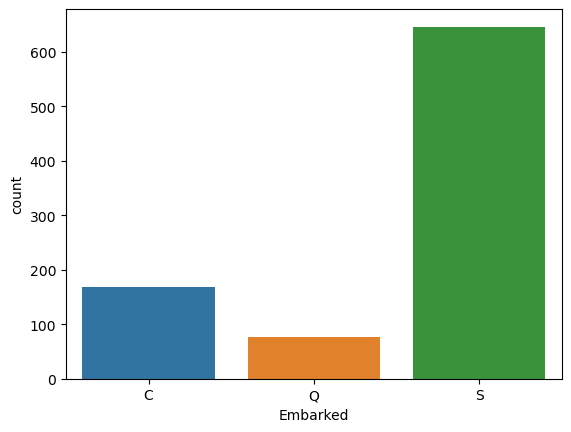

In [25]:
print((df['Embarked'].value_counts()/891)*100)
sns.countplot(x='Embarked',data=df)

C:\Users\ANISH KUSHWAHA\AppData\Local\Temp\ipykernel_2292\3570299730.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
C:\Users\ANISH KUSHWAHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


0.45956263424701577
0.9865867453652877


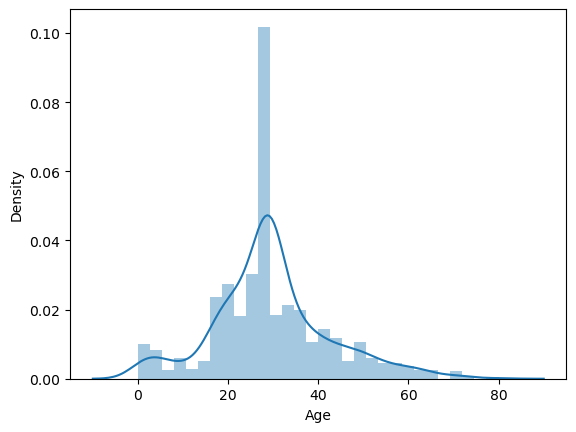

In [26]:
# Age column
sns.distplot(df['Age'])
print(df['Age'].skew())
print(df['Age'].kurt())

In [27]:
#skewness & Kurtosis

<Axes: >

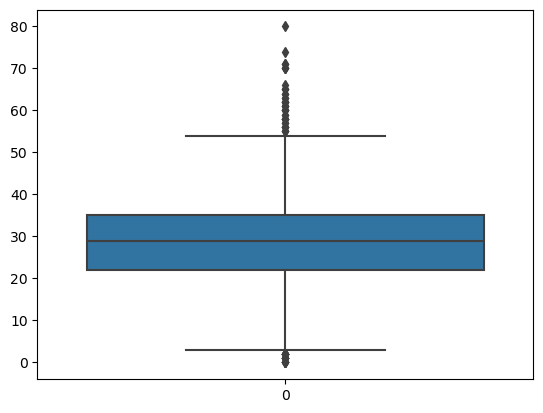

In [28]:
sns.boxplot(df['Age'])

In [29]:
# Different Age Group
print('People with age in between 60 & 70 are',df[(df['Age']>60) & (df['Age']<70)].shape[0])
print('People with age in between 70 & 75 are',df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print('People with age greater than 75 are',df[df['Age']>75].shape[0])
print('-'*50)
print('People with age between 0 and 1',df[df['Age']<1].shape[0])

People with age in between 60 & 70 are 15
People with age in between 70 & 75 are 6
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 7


Conclusion:- 
1. For all practical purposes age can be considered as normal distribution
2. Deeper Analysis is required for outlier detection

C:\Users\ANISH KUSHWAHA\AppData\Local\Temp\ipykernel_2292\2942046018.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])
C:\Users\ANISH KUSHWAHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Density'>

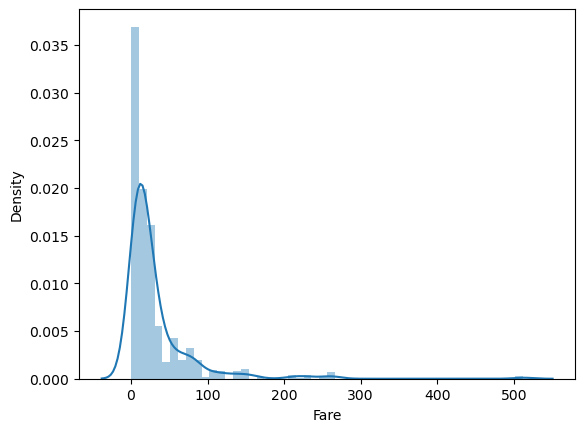

In [30]:
# Fare column
sns.distplot(df['Fare'])

In [31]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

4.787316519674893
33.39814088089868


<Axes: >

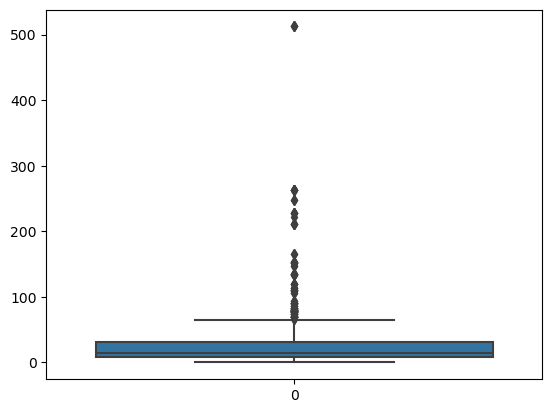

In [32]:
sns.boxplot(df['Fare'])

In [33]:
print('People with fare between $200 and $300',df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print('People with fare in greater than $300', df[df['Fare']>300].shape[0])

People with fare between $200 and $300 17
People with fare in greater than $300 3


Conclusion:-
1. Highly skewed data, a lot of people had cheaper tickets
2. Outliers are there in the data

C:\Users\ANISH KUSHWAHA\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ANISH KUSHWAHA\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


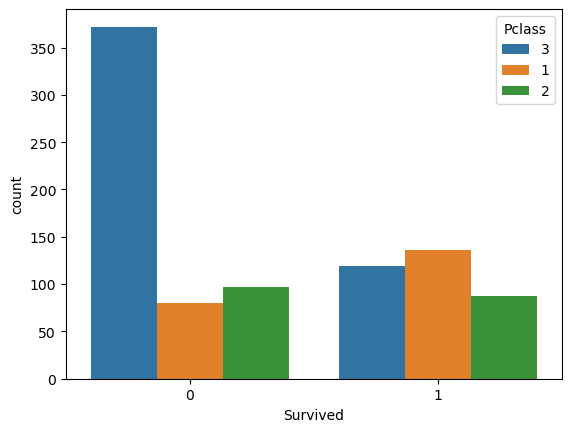

In [39]:
# Multivariate Analysis
# Survival with Pclass
sns.countplot(x='Survived', hue=df['Pclass'].astype(str),data=df)
pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

C:\Users\ANISH KUSHWAHA\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


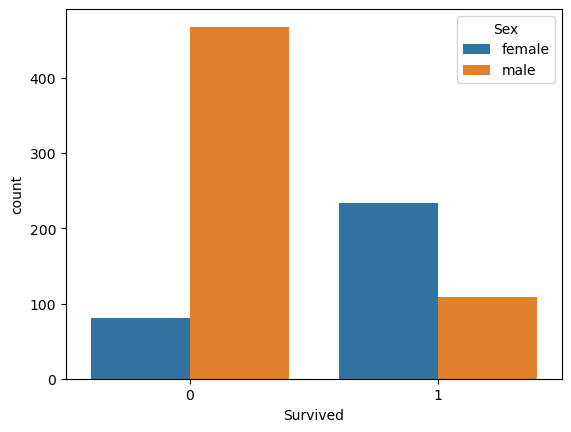

In [40]:
# Survival with Sex
sns.countplot(x='Survived',hue='Sex',data=df)
pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

C:\Users\ANISH KUSHWAHA\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


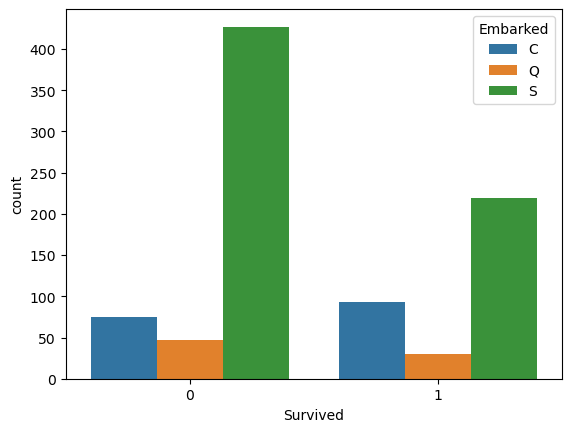

In [41]:
# Survived with Embarked
sns.countplot(x='Survived',hue='Embarked',data=df)
pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

C:\Users\ANISH KUSHWAHA\AppData\Local\Temp\ipykernel_2292\1147318021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Age'])
C:\Users\ANISH KUSHWAHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ANISH KUSHWAHA\AppData\Local\Temp\ipykernel_2292\1147318021.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figur

<Axes: xlabel='Age', ylabel='Density'>

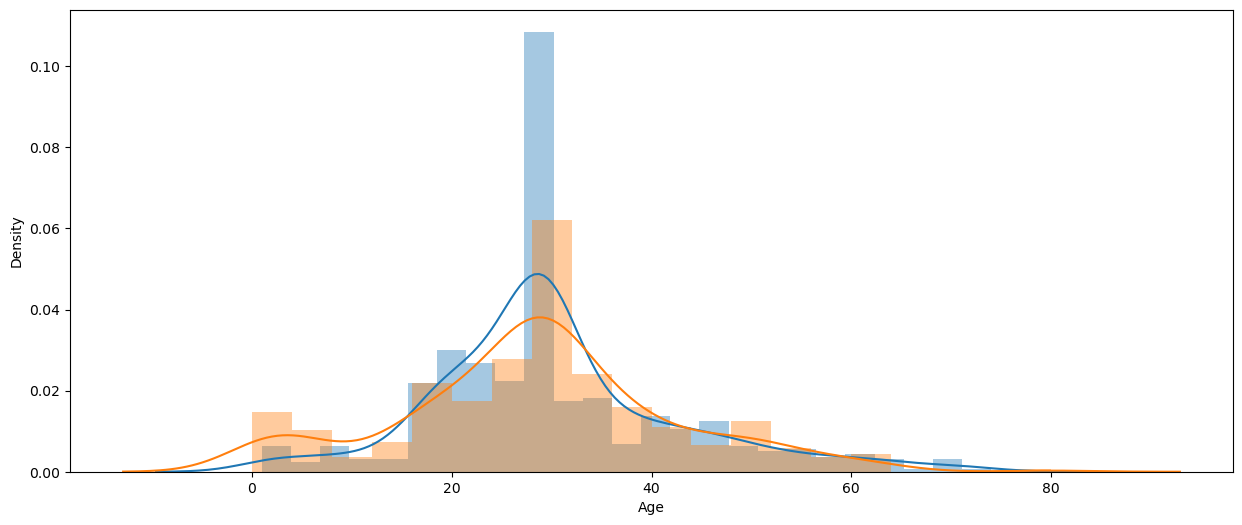

In [42]:
# Survived with Age
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

C:\Users\ANISH KUSHWAHA\AppData\Local\Temp\ipykernel_2292\1060383329.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Fare'])
C:\Users\ANISH KUSHWAHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ANISH KUSHWAHA\AppData\Local\Temp\ipykernel_2292\1060383329.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figu

<Axes: xlabel='Fare', ylabel='Density'>

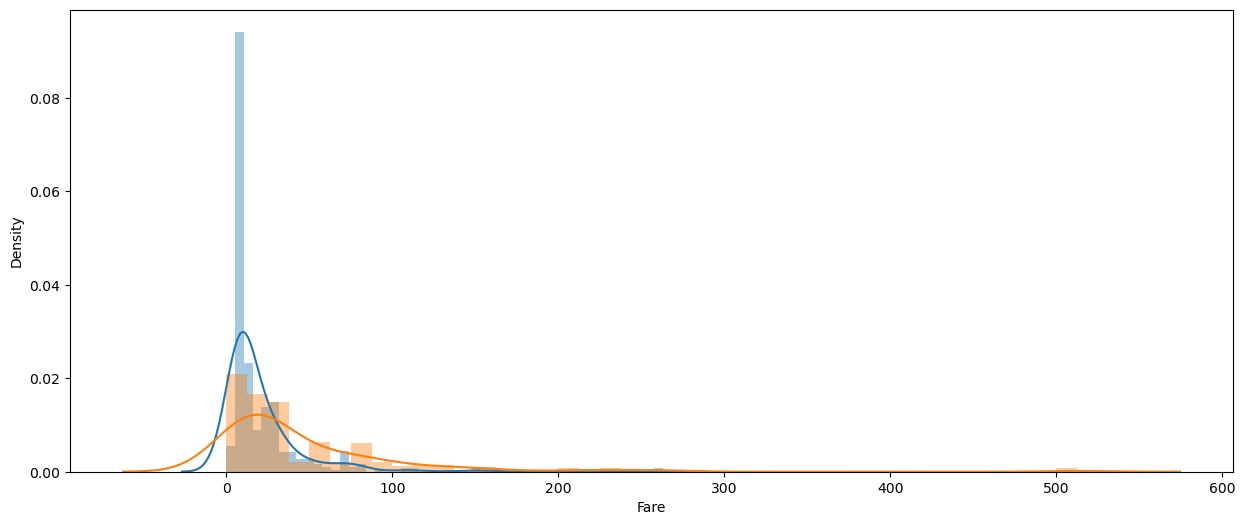

In [43]:
# Survived with Fare
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

C:\Users\ANISH KUSHWAHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ANISH KUSHWAHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ANISH KUSHWAHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ANISH KUSHWAHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

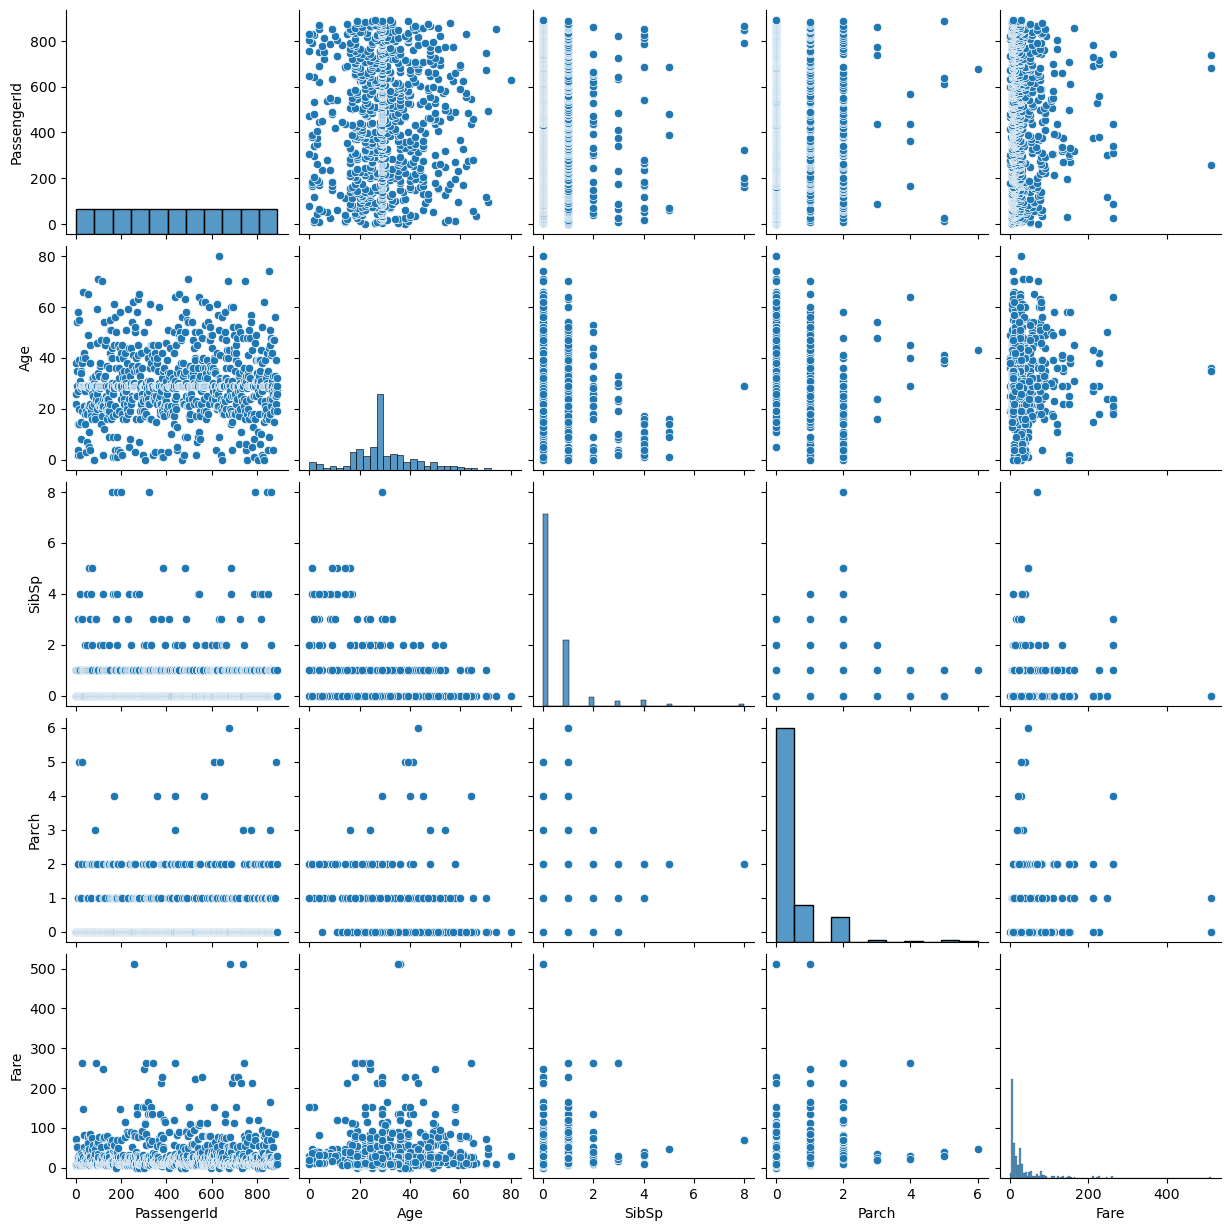

In [44]:
sns.pairplot(df)

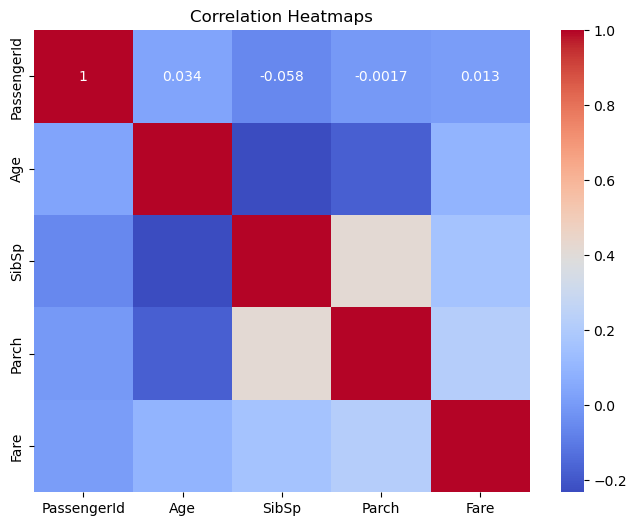

In [47]:
cols = ['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']
selected_df = df[cols]

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmaps")
plt.show()

In [48]:
#Feature Engineering
# Creation of a new column by the name of family which will be the sum of SibSp and Parch cols
df['family_size']=df['Parch']+df['SibSp']

In [49]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
93,94,0,3,"Dean, Mr. Bertram Frank",male,26,1,2,C.A. 2315,20.5750,S,3
215,216,1,1,"Newell, Miss. Madeleine",female,31,1,0,35273,113.2750,C,1
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16,0,0,SOTON/OQ 392089,8.0500,S,0
643,644,1,3,"Foo, Mr. Choong",male,29,0,0,1601,56.4958,S,0
512,513,1,1,"McGough, Mr. James Robert",male,36,0,0,PC 17473,26.2875,S,0


In [50]:
# now we will add a new feature by the name of family type
def family_type(number):
    if(number==0):
        return "Alone"
    elif number > 0 and number <=4:
        return "Medium"
    else:
        return "Large"

In [51]:
df['family_type']=df['family_size'].apply(family_type)

In [52]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
223,224,0,3,"Nenkoff, Mr. Christo",male,29,0,0,349234,7.8958,S,0,Alone
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,29,0,0,374746,8.0500,S,0,Alone
400,401,1,3,"Niskanen, Mr. Juha",male,39,0,0,STON/O 2. 3101289,7.9250,S,0,Alone
364,365,0,3,"O'Brien, Mr. Thomas",male,29,1,0,370365,15.5000,Q,1,Medium
476,477,0,2,"Renouf, Mr. Peter Henry",male,34,1,0,31027,21.0000,S,1,Medium


In [55]:
# dropping SibSp, Parch and family_size
df.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [56]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24,29106,18.750,S,Large
273,274,0,1,"Natsch, Mr. Charles H",male,37,PC 17596,29.700,C,Medium
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17,3101281,7.925,S,Large
658,659,0,2,"Eitemiller, Mr. George Floyd",male,23,29751,13.000,S,Alone
286,287,1,3,"de Mulder, Mr. Theodore",male,30,345774,9.500,S,Alone


In [57]:
pd.crosstab(df['family_type'],df['Survived']).apply(lambda r:round((r/r.sum())*100,1),axis=1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


Detecting outliers

Numerical Data
1. if the data is following normal distribution, anything beyond 3SD - mean + 3SD can be considered as an outlier
2. if the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5 IQR and Q3 + 1.5 IQR

Categorical Data
1. if the column is highly imbalamced for eg male 10000 and female 2 then we can eliminate female

In [60]:
# Handling outliers in Age(almost normal)
df=df[df['Age']<(df['Age'].mean()+3 * df['Age'].std())]
df.shape

(884, 10)

In [63]:
# handling outliers from fare column
# finding quartiles
Q1=np.percentile(df['Fare'],25)
Q3=np.percentile(df['Fare'],75)

outlier_low=Q1 - 1.5 * (Q3 - Q1)
outlier_high=Q3 + 1.5 * (Q3 - Q1)

df=df[(df['Fare']>outlier_low) & (df['Fare'] < outlier_high)]

In [64]:
# one hot encoding
df.sample(4)

# Cols to be transformed are Pclass, Sex, Embarked, family_type
pd.get_dummies(data=df, columns=['Pclass', 'Sex', 'Embarked', 'family_type'], drop_first=True)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,False,True,True,False,True,False,True
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,False,True,False,False,True,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,False,False,False,False,True,False,True
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,False,True,True,False,True,False,False
5,6,0,"Moran, Mr. James",29,330877,8.4583,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,211536,13.0000,True,False,True,False,True,False,False
887,888,1,"Graham, Miss. Margaret Edith",19,112053,30.0000,False,False,False,False,True,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,False,True,False,False,True,False,True
889,890,1,"Behr, Mr. Karl Howell",26,111369,30.0000,False,False,True,False,False,False,False


In [65]:
df=pd.get_dummies(data=df, columns=['Pclass', 'Sex', 'Embarked', 'family_type'], drop_first=True)

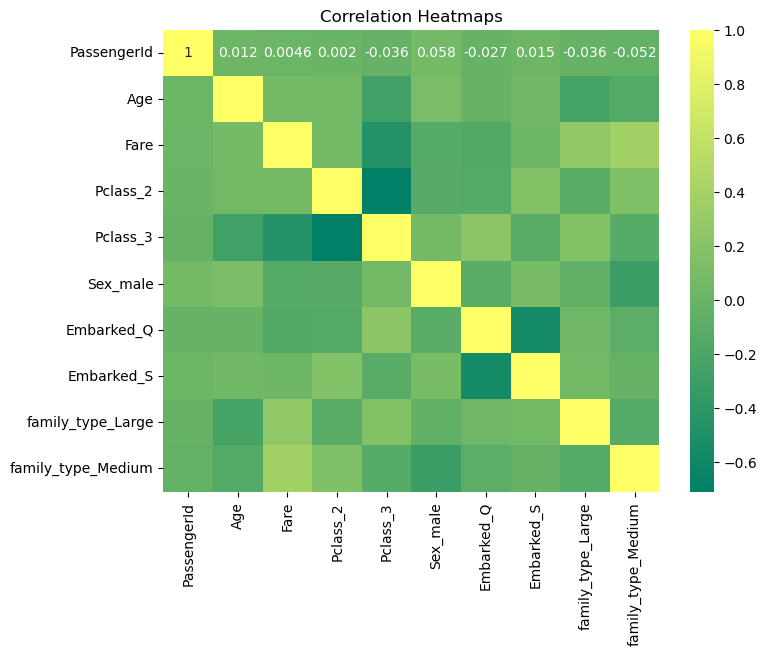

In [67]:
cols = ['PassengerId', 'Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'family_type_Large', 'family_type_Medium']
selected_df = df[cols]

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(selected_df.corr(), annot=True, cmap='summer')
plt.title("Correlation Heatmaps")
plt.show()

Overall Conclusions:
1. Chance of female survival is higher than male survival
2. Travelling in Pclass 3 is very risky, almost deadliest
3. Somehow, people going to C survived more
4. People in the Age range of 20 to 40 had a higher chance of not surviving
5. People travelling with smaller families had a higher chance of survivng in comparison to people with large family and travelling alone.